In [1]:
#do this later from admin: !python -m pip install --upgrade pip


# TOC

0. [Imports](#first-bullet)
1. [Functions](#1.0-bullet)
2. [Main Pull](#2.0-bullet)
3. [Cleaning](#3.0-bullet)  
 3.1 [Pt 1 - Basic Cleaning](#3.1-bullet)  
 3.2 [Pt 2 - Advanced Cleaning and feature engineering](#3.2-bullet)
4. [Reference and Planning](#4.0-bullet)

# The intent of this workbook is to pull and deal with comments only

I am waiting until I can get the view count max stuff to be able to pull comments from peak month. 
Too many of these are just people 'membering watching it. 

Possible question: how long until people start those stupid posts?

In [2]:
#Basic
import pandas as pd
import numpy as np
#Math
import scipy as sp
from random import randint
from math import exp
import operator

#Scraping
import requests
import json

#Youtube Data API Packages: 
from apiclient.discovery import build
from apiclient.errors import HttpError
from oauth2client.tools import argparser
from googleapiclient.discovery import build
import argparse
"""
from googleapiclient.errors import HttpError"""

#Modeling
#from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
#from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.cluster import KMeans
#from sklearn.svm import SVC
#from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

#NLP & Text Management
'''from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer'''
import re

#Time analysis
import time
import datetime as dt
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud

%matplotlib inline
plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')

In [3]:
my_api_file = open("./mykey.txt", 'r')
my_api_str = my_api_file.read()
my_api_file.close()

In [4]:
DEVELOPER_KEY = my_api_str
YOUTUBE_API_SERVICE_NAME = "youtube"
YOUTUBE_API_VERSION = "v3"

# <a class="anchor" id="1.0-bullet"> 1. Functions</a>

In [5]:
#This function will grab 50 comments at a time from the video. 
def youtube_comment_list(video_id, max_results=50, sort_method='viewCount', token=None):
  # Call the search.list method to retrieve results matching the specified query term.
    youtube = build(YOUTUBE_API_SERVICE_NAME, YOUTUBE_API_VERSION,
    developerKey=DEVELOPER_KEY)

  # Call the search.list method to retrieve results matching the specified query term.
    search_response = youtube.commentThreads().list(
        videoId = video_id,
        part='snippet, replies',
        pageToken=token,
        order = 'relevance',
        maxResults=max_results,
      ).execute()
    
    return search_response

# <a class="anchor" id="2.0-bullet"> 2. Data Pull</a>

In [26]:
letters = 'abcdefghijklmnopqrxtuvwxyz'

In [35]:
df_main = pd.read_csv('./data/clean_data_nocomments_noviews_02.10.18.csv')

In [36]:
df_rel_ids = df_main.loc[:, ['vidId']]

In [59]:
df_main[df_main.title.str.contains('GANGNAM')].sort_values(by='viewCount', ascending=False).loc[:, ['title', 'description', 'viewCount', 'vidId', 'commentCount']]

,title,description,viewCount,vidId,commentCount
3634,PSY - GANGNAM STYLE(강남스타일) M/V,PSY - ‘I LUV IT’ M/V @ https://youtu.be/Xvjnoa...,3218413082,9bZkp7q19f0,5263218


In [40]:
test_id = 'DRS_PpOrUZ4'
result = youtube_comment_list(test_id)

In [50]:
result['items'][0]

{'kind': 'youtube#commentThread',
 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/l-UuTX60ouqvQTU_USZ3sayAri0"',
 'id': 'UgwSWFnRgSmJTxiKlBR4AaABAg',
 'snippet': {'videoId': 'DRS_PpOrUZ4',
  'topLevelComment': {'kind': 'youtube#comment',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/bczmlzzMlUPLjzu90A987EJCg3o"',
   'id': 'UgwSWFnRgSmJTxiKlBR4AaABAg',
   'snippet': {'authorDisplayName': 'Van Hendrix',
    'authorProfileImageUrl': 'https://yt3.ggpht.com/-Vk4yQ_apc6s/AAAAAAAAAAI/AAAAAAAAAAA/i9KiAMa0Kzc/s28-c-k-no-mo-rj-c0xffffff/photo.jpg',
    'authorChannelUrl': 'http://www.youtube.com/channel/UC-8iT0qiulLECvKjkRwvfKw',
    'authorChannelId': {'value': 'UC-8iT0qiulLECvKjkRwvfKw'},
    'videoId': 'DRS_PpOrUZ4',
    'textDisplay': '&quot;Don&#39;t forget to go when you leave&quot;',
    'textOriginal': '"Don\'t forget to go when you leave"',
    'canRate': True,
    'viewerRating': 'none',
    'likeCount': 8003,
    'publishedAt': '2018-08-03T06:46:46.000Z',
    'updatedAt': '2018-08-03T06:46:46.000Z'

In [51]:
results2 = youtube_comment_list('9wnbDGh7bEY')

In [58]:
results2['items'][2]

{'kind': 'youtube#commentThread',
 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/7qkmfur0QRkndzMgW99AvgNtVn0"',
 'id': 'Ugyau--00Twca_Yd1o14AaABAg',
 'snippet': {'videoId': '9wnbDGh7bEY',
  'topLevelComment': {'kind': 'youtube#comment',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/FrwsrQaswau7r-BLmOErMpTXSEY"',
   'id': 'Ugyau--00Twca_Yd1o14AaABAg',
   'snippet': {'authorDisplayName': 'Hebrew Samurai Go Ichi',
    'authorProfileImageUrl': 'https://yt3.ggpht.com/-3QpWLWhiWdc/AAAAAAAAAAI/AAAAAAAAAAA/9Brb4tKCT08/s28-c-k-no-mo-rj-c0xffffff/photo.jpg',
    'authorChannelUrl': 'http://www.youtube.com/channel/UC4MhWbDuTHvHtS3NlxbcvCw',
    'authorChannelId': {'value': 'UC4MhWbDuTHvHtS3NlxbcvCw'},
    'videoId': '9wnbDGh7bEY',
    'textDisplay': 'Wow...... If they will give us each $100,000 a piece plus airfare I would go',
    'textOriginal': 'Wow...... If they will give us each $100,000 a piece plus airfare I would go',
    'canRate': True,
    'viewerRating': 'none',
    'likeCount': 0,
    'publishedA

In [60]:
results3 = youtube_comment_list('9bZkp7q19f0')

In [80]:
df_list = []
for i in range(50):
    df_list.append({'comment':results3['items'][i]['snippet']['topLevelComment']['snippet']['textDisplay']})

In [82]:
pd.DataFrame(df_list)

,comment
0,September 2018? PS: who came to see the number...
1,<b>2018????</b>
2,Who is just here to feel the old vibes??
3,<b>Who came to see the number of views?</b>
4,5% 2012 comments <br /><br />93% “Who’s watchi...
5,Who else came back just to see the views?
6,Six years since this dropped onto the World? H...
7,<b>Inglish</b><br /><br />&quot;Despacito&quot...
8,"Who&#39;s here in 2018, 2019, 2020,<br /><br /..."
9,No👏One👏Cares👏What👏Year👏Your👏Watching👏This👏 Per...


In [74]:
len(results3['items'])

50

In [86]:
df_main.commentCount.sum() / df_main.viewCount.sum()

0.0003646651019879802

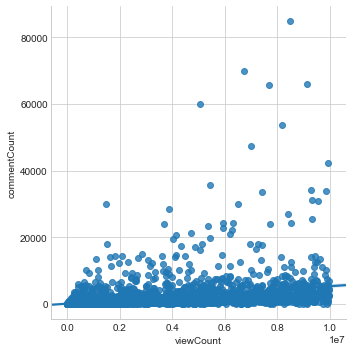

In [84]:
sns.lmplot('viewCount', 'commentCount', data=df_main[df_main['viewCount']<10000000])

# <a class="anchor" id="3.0-bullet"> 3. Cleanup</a>

# <a class="anchor" id="4.0-bullet"> 4.0 Reference and Planning</a>

YouTube Search_list filtering parameters (sort_method):
* date – Resources are sorted in reverse chronological order based on the date they were created.
* rating – Resources are sorted from highest to lowest rating.
* relevance – Resources are sorted based on their relevance to the search query. This is the default value for this parameter.
* title – Resources are sorted alphabetically by title.
* videoCount – Channels are sorted in descending order of their number of uploaded videos.
* viewCount – Resources are sorted from highest to lowest number of views. For live broadcasts, videos are sorted by number of concurrent viewers while the broadcasts are ongoing.

More cleanup needed in main EDA: 
* separate artist and title
* find feat artists
* fillna description